<a href="https://colab.research.google.com/github/Slkandu/ML/blob/main/tft%26tcn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tcn

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tcn import TCN
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url)
data = df['Passengers'].values

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.isnull().sum()

,0
Month,0
Passengers,0


In [ ]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12
X, y = create_sequences(data, seq_length)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = keras.Sequential([
    TCN(input_shape=(seq_length, 1)),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 244ms/step - loss: 7177394.0000 - val_loss: 3931506.2500
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1201853.5000 - val_loss: 101062.1094
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 52727.6016 - val_loss: 690854.6875
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 206939.6250 - val_loss: 14316.1885
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14474.0254 - val_loss: 205141.5312
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 61096.0742 - val_loss: 23489.7246
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4961.4766 - val_loss: 67578.6875
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 26080.0254 - val_loss: 26594.0547
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7833.4600 - val_loss: 18199.9258
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7392.0288 - val_loss: 19403.9004
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 4174.6602 - val_loss: 3

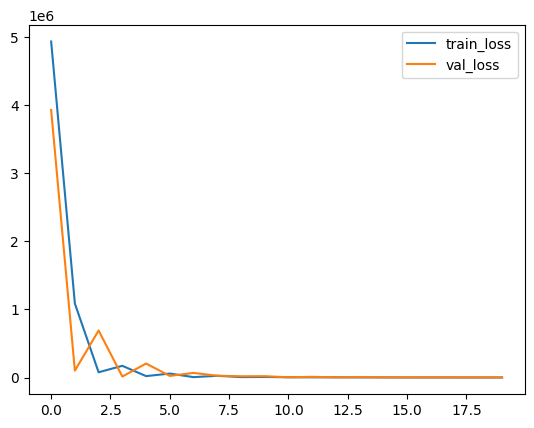

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


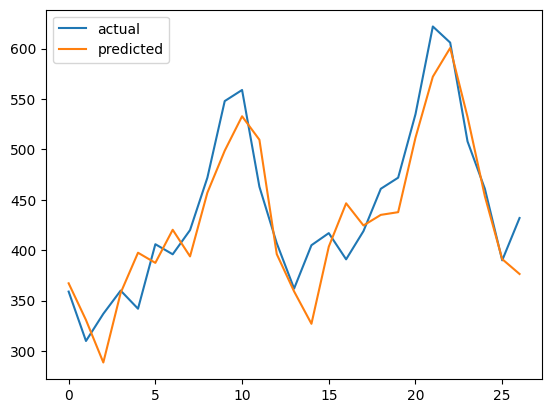

In [ ]:
plt.plot(y_test, label='actual')
plt.plot(predictions, label='predicted')
plt.legend()
plt.show()

In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00


In [ ]:
from darts import TimeSeries
from darts.models import TFTModel
from darts.datasets import AirPassengersDataset
import matplotlib.pyplot as plt

In [ ]:
series = AirPassengersDataset().load()

In [ ]:
train, val = series.split_before(0.8)

In [ ]:
from darts.models import TFTModel

model = TFTModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=20,
    random_state=0,
    add_relative_index=True
)


In [ ]:
model.fit(train)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_metrics                       | MetricCollection                 | 0      | train
2  | input_embeddings                  | _MultiEmbedding                  | 0      | train
3  | static_covariates_vsn             | _VariableSelectionNetwork        | 0      | train
4  | encoder_vsn                       | _VariableSelectionNetwork        | 1.2 K  | train
5  | decoder_vsn                       | _VariableSelectionNetwork   

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


TFTModel(output_chunk_shift=0, hidden_size=16, lstm_layers=1, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=True, loss_fn=None, likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=24, output_chunk_length=12, n_epochs=20, random_state=0)

In [ ]:
forecast = model.predict(n=12)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

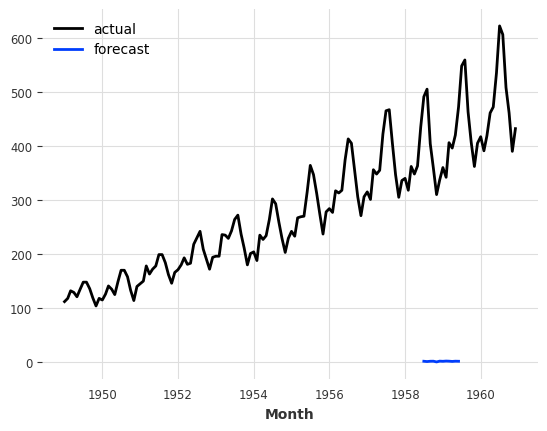

In [ ]:
series.plot(label='actual')
forecast.plot(label='forecast')
plt.legend()
plt.show()

In [ ]:
from darts.metrics import mape
error = mape(val[:12], forecast)
print(f"MAPE: {error}%")

MAPE: 99.59708993795594%
